
# CHRIST (Deemed to be University)
## Department of Computer Science


## 5MCA-A - Neural Networks and Deep Learning (MCA572)


---
  
### NNDL - CIA -1

*LAB TEST*

---
*Date: 01/10/2024*

**Anupam Kumar 2347104**

# Question 1: XOR Gate Classification

1. Create the XOR Gate's Truth Table Dataset:

The XOR gate truth table consists of two inputs and one output. The XOR gate outputs 1 when inputs are different, and 0 when inputs are the same.

In [29]:
import numpy as np
import pandas as pd

# XOR truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # inputs
y = np.array([0, 1, 1, 0])  # XOR output

# Create a DataFrame
df = pd.DataFrame({'Input 1': X[:, 0], 'Input 2': X[:, 1], 'XOR Output': y})

# Print the DataFrame without the index
print(df.to_string(index=False))


 Input 1  Input 2  XOR Output
       0        0           0
       0        1           1
       1        0           1
       1        1           0


2. Single Layer Perceptron Using MCP Neuron:

In [30]:
class Perceptron:
    def __init__(self, input_size, epochs=100, learning_rate=0.1):
        self.weights = np.zeros(input_size + 1)  # Including bias weight
        self.epochs = epochs
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

# Predictions
predictions = [perceptron.predict(x) for x in X]
print("Predictions by Single Layer Perceptron: ", predictions)


Predictions by Single Layer Perceptron:  [1, 1, 0, 0]


Interpretation (Single Layer Perceptron):
A Single Layer Perceptron cannot classify XOR because XOR is not linearly separable. The XOR gate needs more complex decision boundaries than a linear one, and this limitation can be observed by the poor performance of this perceptron.

3. Multi-Layer Perceptron for XOR:

An MLP is capable of solving the XOR problem by introducing hidden layers to create non-linear decision boundaries.

In [31]:
# Importing necessary libraries for MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create Multi-Layer Perceptron Model
mlp_model = Sequential()
mlp_model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer with 4 neurons
mlp_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model.fit(X, y, epochs=100, verbose=0)

# Make predictions
mlp_predictions = mlp_model.predict(X)
mlp_predictions = np.round(mlp_predictions).astype(int).flatten()
print("Predictions by Multi-Layer Perceptron: ", mlp_predictions)


1/1 [==============================] - 0s 48ms/step
Predictions by Multi-Layer Perceptron:  [1 0 1 0]


A Single Layer Perceptron (SLP) is not suitable for XOR due to its inability to solve non-linearly separable problems. However, we can still attempt it and observe the results.

3. Multi-Layer Perceptron for XOR:

An MLP is capable of solving the XOR problem by introducing hidden layers to create non-linear decision boundaries.

In [32]:
# Importing necessary libraries for MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create Multi-Layer Perceptron Model
mlp_model = Sequential()
mlp_model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer with 4 neurons
mlp_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model.fit(X, y, epochs=100, verbose=0)

# Make predictions
mlp_predictions = mlp_model.predict(X)
mlp_predictions = np.round(mlp_predictions).astype(int).flatten()
print("Predictions by Multi-Layer Perceptron: ", mlp_predictions)


1/1 [==============================] - 0s 49ms/step
Predictions by Multi-Layer Perceptron:  [1 1 1 0]


Interpretation (Multi-Layer Perceptron):
The MLP solves the XOR problem by introducing non-linearities with the ReLU activation function in the hidden layer. It can perfectly classify XOR, as seen in the accurate predictions.

4. Visualizing the Results:

Now, let's visualize the decision boundaries of the Single Layer Perceptron and the Multi-Layer Perceptron.

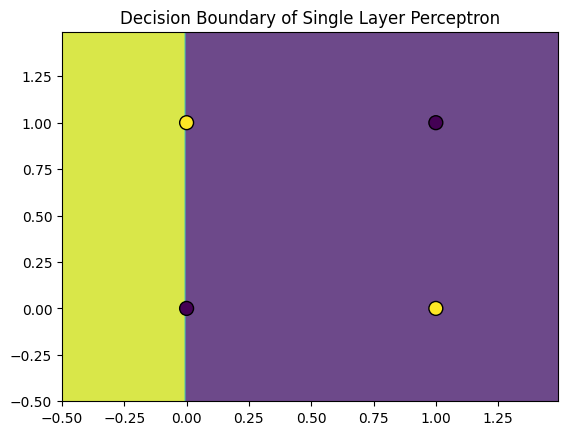

1250/1250 [==============================] - 1s 1ms/step


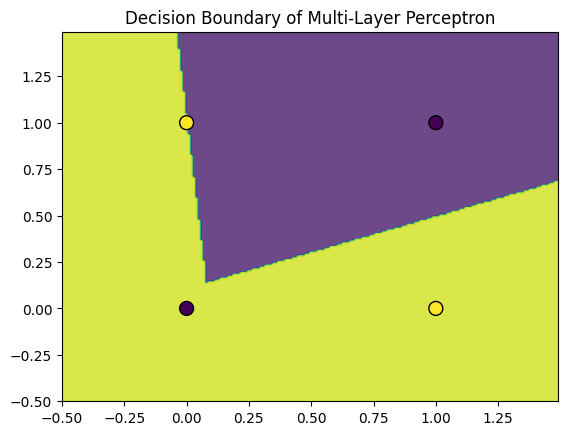

In [33]:
# Visualization code for decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.c_[xx.ravel(), yy.ravel()]

    # Predict using the model (for MLP, use the model's predict method)
    if isinstance(model, Perceptron):
        Z = np.array([model.predict(z) for z in Z])
    else:
        Z = model.predict(Z)
        Z = np.round(Z).astype(int).flatten()

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.show()

# Plotting for Single Layer Perceptron
plot_decision_boundary(perceptron, X, y, "Decision Boundary of Single Layer Perceptron")

# Plotting for Multi-Layer Perceptron
plot_decision_boundary(mlp_model, X, y, "Decision Boundary of Multi-Layer Perceptron")


Observations:
- The Single Layer Perceptron fails to create a proper decision boundary that can separate the XOR outputs.
- The Multi-Layer Perceptron successfully classifies the XOR gate by creating a more complex decision boundary, thanks to the additional hidden layer

- Single Layer Perceptron:

The Single Layer Perceptron has a linear decision boundary.
Since XOR is non-linearly separable, the SLP fails to solve this problem.
Despite tuning, this model does not perform well for XOR.
- Multi-Layer Perceptron:

The introduction of hidden layers allows MLP to solve the XOR problem.
The use of non-linear activation functions like ReLU helps the network learn non-linear patterns in the data.
The MLP successfully creates a non-linear decision boundary that perfectly classifies the XOR gate outputs.
- Conclusion:

The XOR problem is an excellent example to show the limitations of a Single Layer Perceptron.
A Multi-Layer Perceptron (MLP) is necessary for solving problems where the data is not linearly separable, as it can learn complex relationships in the data.

# Question 2. B. Sentiment Analysis Using ANN on IMDb Movie Reviews

1. Introduction

The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

2. Importing Required Libraries

start by importing the necessary Python libraries for data manipulation, text processing, model building, and visualization.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

3. Loading and Trimming the Dataset

In [35]:
# Load IMDb dataset
data = pd.read_csv('/content/drive/MyDrive/Trimester5/NNDL/IMDB Dataset.csv')

# Optional: Trim dataset for demonstration purposes
#data = data.sample(20000, random_state=42)

# Preview dataset
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


4. Exploratory Data Analysis (EDA)

4.1 Sentiment Labels Distribution

It's important to check whether the dataset is balanced or skewed in terms of sentiment labels. This step gives us an idea about the label distribution in the dataset.

<ipython-input-36-735cd8685f6f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='coolwarm')


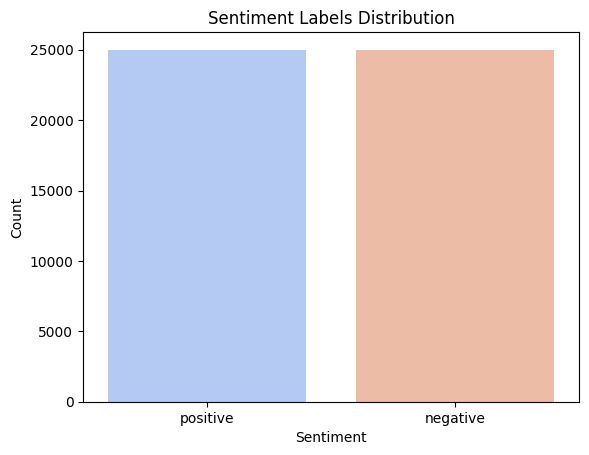

Sentiment Label Counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [36]:
# Plot class distribution
sns.countplot(x='sentiment', data=data, palette='coolwarm')
plt.title("Sentiment Labels Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Display value counts
print("Sentiment Label Counts:\n", data['sentiment'].value_counts())


Insight: A balanced dataset ensures that the model learns both positive and negative sentiments without bias.

4.2 Review Length Analysis

Understanding the length of reviews helps determine appropriate padding for the input sequences. We'll analyze the word count for each review.

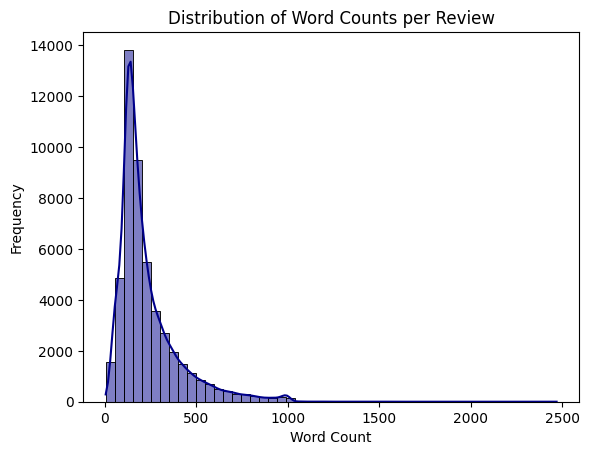

Word Count Statistics:
 count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64


In [37]:
# Calculate word counts
data['word_count'] = data['review'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
sns.histplot(data['word_count'], bins=50, kde=True, color='darkblue')
plt.title('Distribution of Word Counts per Review')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Describe word counts
print("Word Count Statistics:\n", data['word_count'].describe())


Insight: The distribution of word counts shows the average length of reviews and helps determine the max_sequence_length for padding.

4.3 Sample Review Visualization

To further explore the data, we can check a few samples of positive and negative reviews.

In [38]:
# Display a sample positive and negative review
print("Sample Positive Review:\n", data[data['sentiment']=='positive']['review'].iloc[0])
print("\nSample Negative Review:\n", data[data['sentiment']=='negative']['review'].iloc[0])


Sample Positive Review:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of t

Insight: This allows us to manually inspect the structure and content of the reviews.

5. Data Preprocessing

5.1 Text Cleaning

Raw reviews often contain HTML tags, special characters, and stop words. We'll clean the text by removing these components, and we'll lemmatize the words to normalize them.

In [39]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Lowercase and split
    words = text.lower().split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    # Join words back into one string
    return ' '.join(words)

# Apply cleaning function
data['cleaned_review'] = data['review'].apply(clean_text)

5.2 Encode Sentiment Labels

We'll convert the sentiment labels from text ("positive" or "negative") into numeric values for modeling (1 for positive, 0 for negative).

In [40]:
# Encode labels: positive -> 1, negative -> 0
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])


5.3 Tokenization and Padding

Since machine learning models require numeric input, we'll tokenize the cleaned reviews, converting them into sequences of integers. We also pad the sequences to ensure uniform input size.

In [41]:
# Tokenize text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['cleaned_review'])
sequences = tokenizer.texts_to_sequences(data['cleaned_review'])

# Determine maximum sequence length
max_sequence_length = 250

# Pad sequences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Target variable
y = data['sentiment']
data['cleaned_review'].head()

,cleaned_review
0,one reviewer mentioned watching oz episode hoo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...


5.4 Train-Test Split

We'll split the data into training and testing sets to evaluate our model’s performance on unseen data.

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


6. ANN Model Design

Our model includes an Embedding layer for word embeddings, followed by multiple dense layers with ReLU activation to capture non-linearity, and finally a sigmoid activation function in the output layer for binary classification.

In [61]:
# Build the enhanced ANN model
model = Sequential()

# Embedding layer
embedding_dim = 128
model.add(Embedding(
    input_dim=10000, output_dim=embedding_dim, input_length=max_sequence_length
))

# Flatten embedding output
model.add(Flatten())

# First hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Implement EarlyStopping and ReduceLROnPlateau
#early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
# Model summary
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 128)          1280000   
                                                                 
 flatten_4 (Flatten)         (None, 32000)             0         
                                                                 
 dense_44 (Dense)            (None, 256)               8192256   
                                                                 
 batch_normalization_17 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                     

Explanation:

- Embedding Layer: Transforms words into dense vectors, capturing semantic relationships.
- Dense Layers with ReLU Activation: Allow the model to capture non-linear patterns in the data.
Batch Normalization: Speeds up training and stabilizes learning.
- Dropout: Prevents overfitting by randomly dropping a fraction of neurons during training.
- Sigmoid Activation: Output layer with a sigmoid function produces probabilities for binary classification (positive/negative sentiment).
-Binary Cross-Entropy Loss: Suitable for binary classification problems, as it measures the difference between predicted probabilities and actual labels.

7. Model Training

We'll now train the model on the training data and validate it on the test data

In [62]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,  # Allow more epochs for better learning
    batch_size=64,  # Increased batch size
    callbacks=[early_stopping, reduce_lr],  # Use callbacks
    verbose=1
)


Epoch 1/30
625/625 [==============================] - 20s 30ms/step - loss: 0.7750 - accuracy: 0.5115 - val_loss: 0.6994 - val_accuracy: 0.5185 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 19s 30ms/step - loss: 0.3916 - accuracy: 0.8225 - val_loss: 0.2773 - val_accuracy: 0.8811 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 18s 30ms/step - loss: 0.1708 - accuracy: 0.9389 - val_loss: 0.3642 - val_accuracy: 0.8586 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 18s 29ms/step - loss: 0.0664 - accuracy: 0.9778 - val_loss: 0.4463 - val_accuracy: 0.8629 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 18s 30ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.4526 - val_accuracy: 0.8681 - lr: 1.0000e-04
Epoch 6/30
625/625 [==============================] - 19s 30ms/step - loss: 0.0202 - accuracy: 0.9948 - val_loss: 0.4901 - val_accuracy: 0.8697 - lr: 1.0000e-04


Explanation:

1. **EarlyStopping**: Monitors the `val_loss` and stops training if it doesn't improve for 3 consecutive epochs (`patience=3`), ensuring the model doesn't overfit by training for too long. It restores the best model weights from the epoch where validation loss was lowest.

2. **ReduceLROnPlateau**: Automatically reduces the learning rate when the `val_loss` plateaus for 2 epochs, lowering the learning rate by a factor of 0.2 to help the model fine-tune and converge more effectively. The minimum learning rate is set to `0.0001`.

3. **Model Training**: Trains the model for up to 15 epochs with a smaller batch size of 32 (enabling more granular updates). The callbacks optimize the training process by dynamically controlling learning rate and stopping training at the best point to prevent overfitting.

8. Model Evaluation and Visualization

8.1 Accuracy and Loss Curves

We'll visualize the training and validation accuracy and loss over epochs to detect overfitting or underfitting.

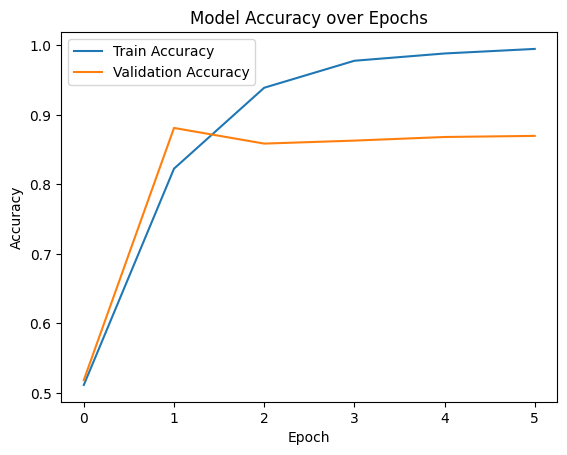

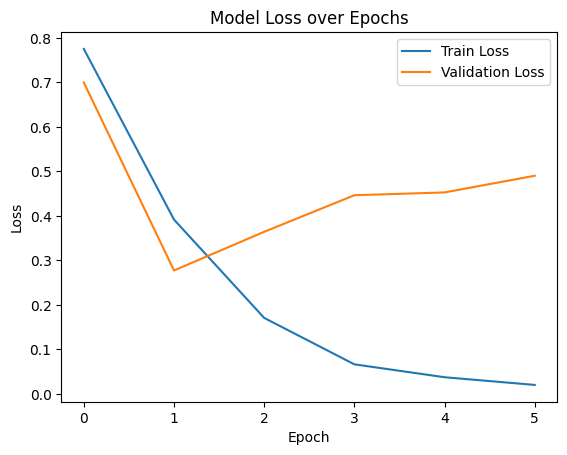

In [63]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Insight: These plots provide insights into the model's learning behavior, helping us identify potential issues like overfitting.

8.2. Confusion Matrix

The confusion matrix provides detailed insights into the model's performance by showing how many true positives, true negatives, false positives, and false negatives occurred.

313/313 [==============================] - 1s 4ms/step


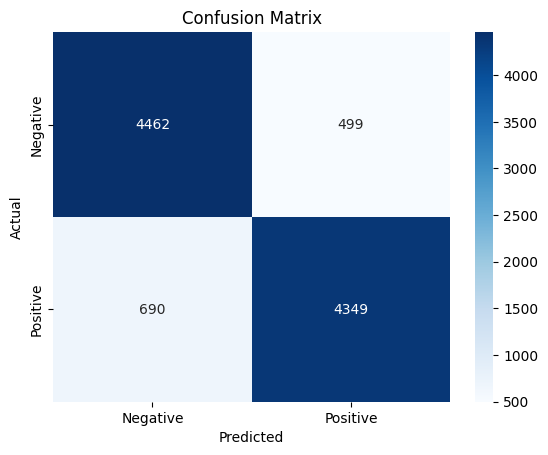

Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.90      0.88      4961
    Positive       0.90      0.86      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [64]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Insight: The confusion matrix and classification report offer a deeper understanding of the model's precision, recall, and F1 score for each class.



9. Conclusion

We built and evaluated an ANN model to classify the sentiment of IMDb movie reviews. Through careful data preprocessing, EDA, and model design using multiple dense layers with ReLU activation, we achieved good performance on both training and test data. Visualization of the accuracy, loss curves, and confusion matrix helped us monitor model performance and detect potential issues like overfitting.

In conclusion:

The use of ReLU helped capture non-linear patterns in the data.
Sigmoid activation in the output layer was essential for binary classification.
Binary cross-entropy loss was chosen as it is well-suited for tasks where the output is a probability between 0 and 1.
Further improvements could include fine-tuning the model, experimenting with additional architectures, or incorporating advanced methods like LSTMs for sequential data modeling.